In [8]:
import pandas as pd

In [7]:
from glm.glm import GLM
from glm.families import Gaussian



In [9]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/Duncan.csv'
prestige = pd.read_csv(url)

In [11]:
prestige.head()

,Unnamed: 0,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90


In [12]:
prestige['type'].value_counts()

bc      21
prof    18
wc       6
Name: type, dtype: int64

In [14]:
prestige['income'].value_counts()

21    4
42    3
76    3
72    2
29    2
9     2
64    2
48    2
7     2
55    2
16    2
8     1
81    1
75    1
78    1
15    1
80    1
67    1
14    1
62    1
17    1
34    1
36    1
41    1
44    1
12    1
47    1
53    1
60    1
22    1
Name: income, dtype: int64

In [13]:
import statsmodels.api as sm
credit_card = sm.datasets.ccard.load_pandas().data

In [15]:
credit_card.head()

,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
0,124.98,38.0,4.52,20.4304,1.0
1,9.85,33.0,2.42,5.8564,0.0
2,15.00,34.0,4.50,20.2500,1.0
3,137.87,31.0,2.54,6.4516,0.0
4,546.50,32.0,9.79,95.8441,1.0


array([[<AxesSubplot:xlabel='income', ylabel='income'>,
        <AxesSubplot:xlabel='education', ylabel='income'>,
        <AxesSubplot:xlabel='prestige', ylabel='income'>],
       [<AxesSubplot:xlabel='income', ylabel='education'>,
        <AxesSubplot:xlabel='education', ylabel='education'>,
        <AxesSubplot:xlabel='prestige', ylabel='education'>],
       [<AxesSubplot:xlabel='income', ylabel='prestige'>,
        <AxesSubplot:xlabel='education', ylabel='prestige'>,
        <AxesSubplot:xlabel='prestige', ylabel='prestige'>]], dtype=object)

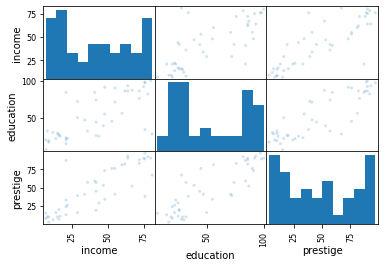

In [18]:
pd.plotting.scatter_matrix(prestige, alpha=0.2)

<AxesSubplot:>

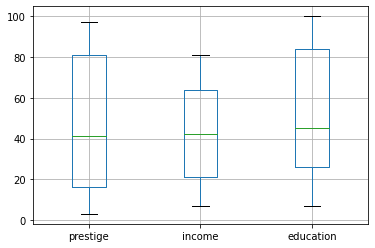

In [21]:
prestige.boxplot(column=['prestige', 'income', 'education'])

In [22]:
prestige.describe()

,income,education,prestige
count,45.000000,45.000000,45.000000
mean,41.866667,52.555556,47.688889
std,24.435072,29.760831,31.510332
min,7.000000,7.000000,3.000000
25%,21.000000,26.000000,16.000000
50%,42.000000,45.000000,41.000000
75%,64.000000,84.000000,81.000000
max,81.000000,100.000000,97.000000


In [30]:
prestige[['income','education']].to_numpy()

array([[ 62,  86],
       [ 72,  76],
       [ 75,  92],
       [ 55,  90],
       [ 64,  86],
       [ 21,  84],
       [ 64,  93],
       [ 80, 100],
       [ 67,  87],
       [ 72,  86],
       [ 42,  74],
       [ 76,  98],
       [ 76,  97],
       [ 41,  84],
       [ 48,  91],
       [ 76,  34],
       [ 53,  45],
       [ 60,  56],
       [ 42,  44],
       [ 78,  82],
       [ 29,  72],
       [ 48,  55],
       [ 55,  71],
       [ 29,  50],
       [ 21,  23],
       [ 47,  39],
       [ 81,  28],
       [ 36,  32],
       [ 22,  22],
       [ 44,  25],
       [ 15,  29],
       [  7,   7],
       [ 42,  26],
       [  9,  19],
       [ 21,  15],
       [ 21,  20],
       [ 16,  26],
       [ 16,  28],
       [  9,  17],
       [ 14,  22],
       [ 12,  30],
       [ 17,  25],
       [  7,  20],
       [ 34,  47],
       [  8,  32]])

In [109]:
X_P = prestige[['income','education']].to_numpy()

In [110]:
X_P.shape

(45, 2)

In [111]:
y_P = prestige['prestige'].to_numpy().reshape(45,1)

In [112]:
y_P.shape

(45, 1)

In [113]:
y_hat_P = y_hat.reshape(-1,1)

In [114]:
model = GLM(family=Gaussian())
model.fit(prestige, formula='prestige ~ income + education')
model.summary()

y_hat_P = model.predict(prestige[['income','education']])

Gaussian GLM Model Summary.
Name          Parameter Estimate  Standard Error
------------------------------------------------
Intercept                  -6.06            4.27
income                      0.60            0.12
education                   0.55            0.10


In [83]:
X_C = credit_card[['AGE','INCOME','INCOMESQ','OWNRENT']].to_numpy()

In [84]:
y_C = credit_card['AVGEXP'].to_numpy()

In [85]:
model = GLM(family=Gaussian())
model.fit(credit_card, formula='AVGEXP ~ AGE + INCOME + INCOMESQ + OWNRENT')
model.summary()

y_hat_C = model.predict(credit_card[['AGE','INCOME','INCOMESQ','OWNRENT']])

Gaussian GLM Model Summary.
Name          Parameter Estimate  Standard Error
------------------------------------------------
Intercept                -237.15          199.35
AGE                        -3.08            5.51
INCOME                    234.35           80.37
INCOMESQ                  -15.00            7.47
OWNRENT                    27.94           82.92


In [82]:
names = model.X_names
p_values = model.p_values_

print("Predictor            p-value")
print("-"*30)
for name, p in zip(names, p_values):
    print(f"{name :<20} {p:2.3f}")

Predictor            p-value
------------------------------
Intercept            0.234
AGE                  0.576
INCOME               0.004
INCOMESQ             0.045
OWNRENT              0.736


array([[<AxesSubplot:xlabel='AVGEXP', ylabel='AVGEXP'>,
        <AxesSubplot:xlabel='AGE', ylabel='AVGEXP'>,
        <AxesSubplot:xlabel='INCOME', ylabel='AVGEXP'>,
        <AxesSubplot:xlabel='INCOMESQ', ylabel='AVGEXP'>,
        <AxesSubplot:xlabel='OWNRENT', ylabel='AVGEXP'>],
       [<AxesSubplot:xlabel='AVGEXP', ylabel='AGE'>,
        <AxesSubplot:xlabel='AGE', ylabel='AGE'>,
        <AxesSubplot:xlabel='INCOME', ylabel='AGE'>,
        <AxesSubplot:xlabel='INCOMESQ', ylabel='AGE'>,
        <AxesSubplot:xlabel='OWNRENT', ylabel='AGE'>],
       [<AxesSubplot:xlabel='AVGEXP', ylabel='INCOME'>,
        <AxesSubplot:xlabel='AGE', ylabel='INCOME'>,
        <AxesSubplot:xlabel='INCOME', ylabel='INCOME'>,
        <AxesSubplot:xlabel='INCOMESQ', ylabel='INCOME'>,
        <AxesSubplot:xlabel='OWNRENT', ylabel='INCOME'>],
       [<AxesSubplot:xlabel='AVGEXP', ylabel='INCOMESQ'>,
        <AxesSubplot:xlabel='AGE', ylabel='INCOMESQ'>,
        <AxesSubplot:xlabel='INCOME', ylabel='INCOMESQ'>,
 

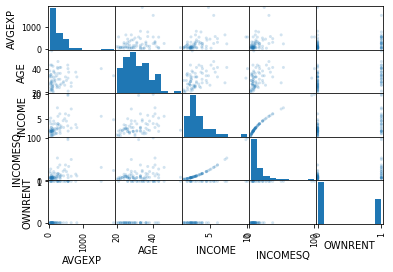

In [20]:
pd.plotting.scatter_matrix(credit_card, alpha=0.2)

In [33]:
import numpy as np

np.random.seed(1)
n = 500  
x = np.random.uniform(-2, 4, size=n)
y = 1 + x - 0.5 * x * x + np.random.normal(size=n)

In [35]:

%matplotlib inline

from math import ceil
import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from glm.glm import GLM
from glm.families import Gaussian


X = np.empty((len(x), 2))
X[:, 0] = x
X[:, 1] = x**2

quadratic_model = LinearRegression()
quadratic_model.fit(X, y)

y_hat = quadratic_model.predict(X)

In [36]:
quadratic_model = LinearRegression()
quadratic_model.fit(X, y)

array([[ 5.02132028e-01,  2.52136574e-01],
       [ 2.32194696e+00,  5.39143769e+00],
       [-1.99931375e+00,  3.99725548e+00],
       [-1.86004564e-01,  3.45976979e-02],
       [-1.11946466e+00,  1.25320111e+00],
       [-1.44596843e+00,  2.09082470e+00],
       [-8.82438732e-01,  7.78698115e-01],
       [ 7.33643623e-02,  5.38232965e-03],
       [ 3.80604845e-01,  1.44860048e-01],
       [ 1.23290040e+00,  1.52004341e+00],
       [ 5.15167086e-01,  2.65397127e-01],
       [ 2.11131700e+00,  4.45765948e+00],
       [-7.73286502e-01,  5.97972014e-01],
       [ 3.26870462e+00,  1.06844299e+01],
       [-1.83567444e+00,  3.36970065e+00],
       [ 2.02280506e+00,  4.09174032e+00],
       [ 5.03828814e-01,  2.53843474e-01],
       [ 1.35213897e+00,  1.82827980e+00],
       [-1.15767837e+00,  1.34021920e+00],
       [-8.11391065e-01,  6.58355461e-01],
       [ 2.80446741e+00,  7.86503747e+00],
       [ 3.80956945e+00,  1.45128194e+01],
       [-1.19454931e-01,  1.42694806e-02],
       [ 2.

In [59]:
import matplotlib.pyplot as plt

def residual_plot(x, y, y_hat, n_bins=50):
    residuals = y - y_hat
    fig,ax = plt.subplots()
    ax.axhline(0, color="black", linestyle="--")
    ax.scatter(x, residuals, color="grey", alpha=0.5)
    ax.set_ylabel("Residuals ($y - \hat y$)")

In [78]:
X[:,0]

(45,)

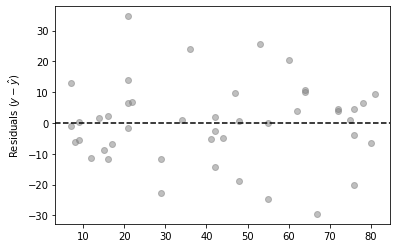

In [79]:
# Income

residual_plot(X[:,0], y, y_hat, n_bins=50)

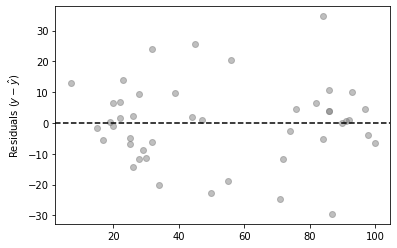

In [80]:
# Education

residual_plot(X[:,1], y, y_hat, n_bins=50)

In [72]:
x.shape

(500,)

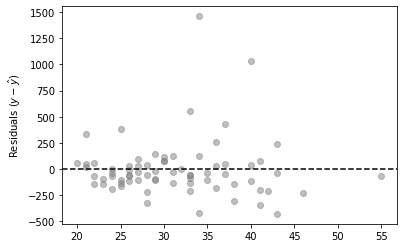

In [86]:
# Age

residual_plot(X_C[:,0], y_C, y_hat_C, n_bins=50)

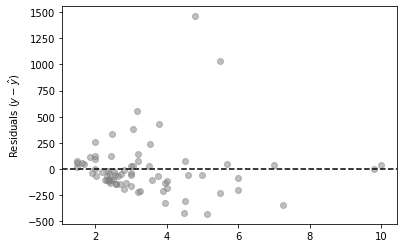

In [87]:
# INCOME

residual_plot(X_C[:,1], y_C, y_hat_C, n_bins=50)

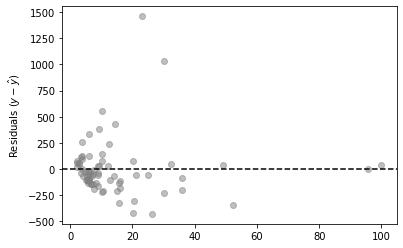

In [88]:
#INCOMESQ

residual_plot(X_C[:,2], y_C, y_hat_C, n_bins=50)

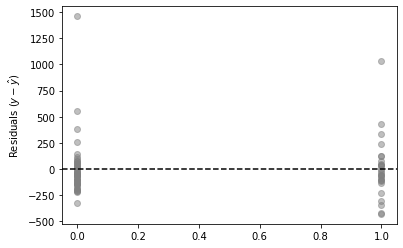

In [89]:
# OWNRENT

residual_plot(X_C[:,3], y_C, y_hat_C, n_bins=50)

In [90]:
import numpy as np

credit_card['LOGAVGEXP'] = np.log(credit_card['AVGEXP'])

In [91]:
credit_card['LOGAVGEXP']

0     4.828154
1     2.287471
2     2.708050
3     4.926311
4     6.303534
        ...   
67    4.225080
68    6.161524
69    5.455535
70    6.111911
71    5.527523
Name: LOGAVGEXP, Length: 72, dtype: float64

In [92]:
y_log_c = credit_card['LOGAVGEXP'].to_numpy()

In [93]:
model = GLM(family=Gaussian())
model.fit(credit_card, formula='LOGAVGEXP ~ AGE + INCOME + INCOMESQ + OWNRENT')
model.summary()

y_hat_C = model.predict(credit_card[['AGE','INCOME','INCOMESQ','OWNRENT']])

Gaussian GLM Model Summary.
Name          Parameter Estimate  Standard Error
------------------------------------------------
Intercept                   3.66            0.69
AGE                        -0.02            0.02
INCOME                      0.77            0.28
INCOMESQ                   -0.05            0.03
OWNRENT                     0.34            0.29


In [94]:
names = model.X_names
p_values = model.p_values_

print("Predictor            p-value")
print("-"*30)
for name, p in zip(names, p_values):
    print(f"{name :<20} {p:2.3f}")

Predictor            p-value
------------------------------
Intercept            0.000
AGE                  0.201
INCOME               0.005
INCOMESQ             0.070
OWNRENT              0.240


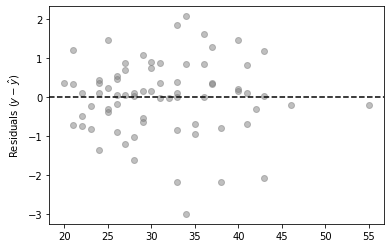

In [95]:
# Age

residual_plot(X_C[:,0], y_log_c, y_hat_C, n_bins=50)

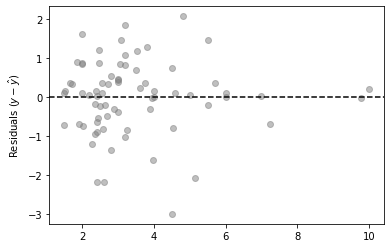

In [96]:
# INCOME

residual_plot(X_C[:,1], y_log_c, y_hat_C, n_bins=50)

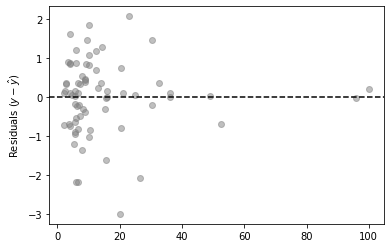

In [97]:
# INCOMESQ

residual_plot(X_C[:,2], y_log_c, y_hat_C, n_bins=50)

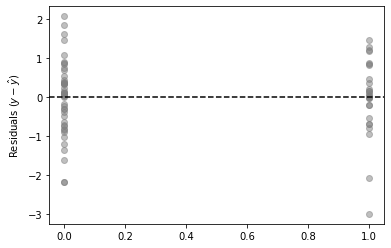

In [98]:
# OWNRENT

residual_plot(X_C[:,3], y_log_c, y_hat_C, n_bins=50)

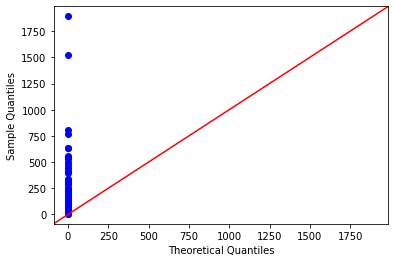

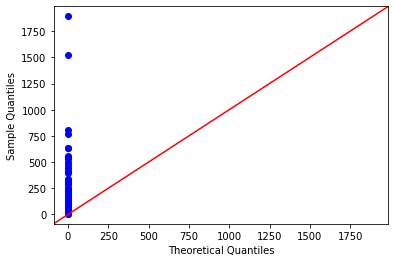

In [107]:
import statsmodels.api as sm 

sm.qqplot(residuals_CC, line ='45') 


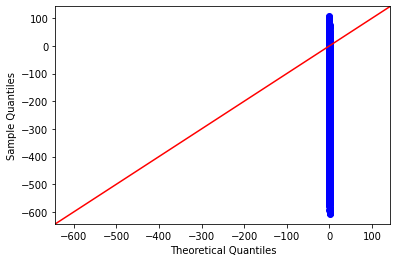

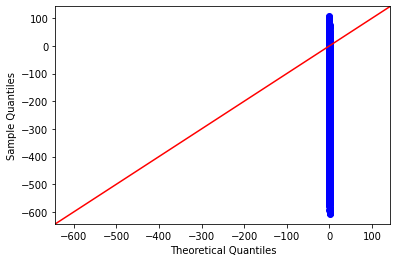

In [108]:
sm.qqplot(residuals_P, line ='45') 

In [105]:
residuals_CC = y_C - y_hat_C

In [106]:
residuals_P = y - y_hat

In [100]:
y_hat_C

array([5.61867835, 4.45867739, 5.7087772 , 4.57238995, 6.3260449 ,
       4.74516094, 5.31395084, 4.86396957, 5.36504774, 4.97946195,
       5.57268546, 4.90791182, 4.45396503, 4.99933336, 5.37422557,
       6.10040784, 4.707142  , 4.53151216, 5.13573111, 5.69778599,
       5.47382088, 4.18192116, 5.87065922, 4.50493325, 4.9551705 ,
       5.11313569, 4.97964754, 5.10705186, 5.99386369, 5.1422262 ,
       5.88948748, 5.2667249 , 4.79346238, 3.99392671, 4.20383839,
       4.4344108 , 4.147269  , 4.59010479, 6.44866488, 4.4387664 ,
       4.33118287, 4.87893533, 4.61773198, 4.76102449, 5.47520267,
       4.84847462, 4.20621261, 4.95535609, 4.52674343, 4.83035243,
       4.87576262, 5.6295353 , 4.94942282, 4.98972368, 4.86477972,
       4.36589205, 4.88166662, 4.52181663, 4.48153229, 5.32408016,
       4.8953766 , 4.71274507, 4.52917387, 4.37830382, 4.32458163,
       4.54485763, 6.15923627, 4.20477732, 6.15952716, 5.2351007 ,
       6.06858668, 5.72491051])